In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

# 1.Data Profiling

In [2]:
housing = pd.read_csv(r"C:\Users\HP\1.Myedusolve\3.Machine Learning\Versi Indo\Housing.csv")
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
housing.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
housing.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

# 2.Data Cleansing

The data no longer has a missing value, but it is okay to check and delete the outliers. However, on this occasion, the outliers were not removed.

In [6]:
housing['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [7]:
housing['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [8]:
housing['basement'].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [9]:
housing['hotwaterheating'].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [10]:
housing['airconditioning'].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [11]:
housing['prefarea'].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [12]:
housing['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

# 3.Exploratory Data Analysis (EDA)

In [13]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


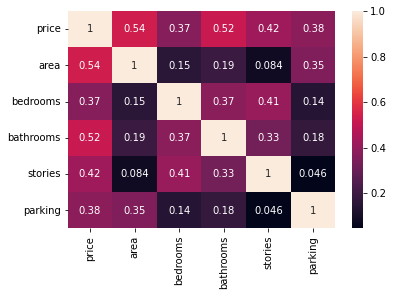

In [14]:
plt.figure(figsize = (6,4))
sns.heatmap(housing.corr(), annot=True);

There are 2 multicollinear ones, namely in the area column with price and bathrooms with price. We have to take down one of them

In [15]:
housing.drop(["area"], axis = 1, inplace=True)

# 4.Feature Engineering

In [16]:
housing.tail(10)

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [17]:
mainroad_enc = pd.get_dummies(housing["mainroad"], prefix = "mainroad", drop_first = False)
housing = housing.drop(["mainroad"], axis = 1)
housing = pd.concat([housing, mainroad_enc], axis=1)

In [18]:
guestroom_enc = pd.get_dummies(housing["guestroom"], prefix = "guestroom", drop_first = False)
housing = housing.drop(["guestroom"], axis = 1)
housing = pd.concat([housing, guestroom_enc], axis=1)

In [19]:
basement_enc = pd.get_dummies(housing["basement"], prefix = "basement", drop_first = False)
housing = housing.drop(["basement"], axis = 1)
housing = pd.concat([housing, basement_enc], axis=1)

In [20]:
hotwaterheating_enc = pd.get_dummies(housing["hotwaterheating"], prefix = "hotwaterheating", drop_first = False)
housing = housing.drop(["hotwaterheating"], axis = 1)
housing = pd.concat([housing, hotwaterheating_enc], axis=1)

In [21]:
airconditioning_enc = pd.get_dummies(housing["airconditioning"], prefix = "airconditioning", drop_first = False)
housing = housing.drop(["airconditioning"], axis = 1)
housing = pd.concat([housing, airconditioning_enc], axis=1)

In [22]:
prefarea_enc = pd.get_dummies(housing["prefarea"], prefix = "prefarea", drop_first = False)
housing = housing.drop(["prefarea"], axis = 1)
housing = pd.concat([housing, prefarea_enc], axis=1)

In [23]:
housing.head(10)

,price,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,4,2,3,2,furnished,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,4,4,4,3,furnished,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,3,2,2,2,semi-furnished,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,4,2,2,3,furnished,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,4,1,2,2,furnished,0,1,0,1,0,1,1,0,0,1,1,0
5,10850000,3,3,1,2,semi-furnished,0,1,1,0,0,1,1,0,0,1,0,1
6,10150000,4,3,4,2,semi-furnished,0,1,1,0,1,0,1,0,0,1,0,1
7,10150000,5,3,2,0,unfurnished,0,1,1,0,1,0,1,0,1,0,1,0
8,9870000,4,1,2,2,furnished,0,1,0,1,0,1,1,0,0,1,0,1
9,9800000,3,2,4,1,unfurnished,0,1,0,1,1,0,1,0,0,1,0,1


Use mapping to furnishingstatus because ordinal

In [24]:
housing["furnishingstatus"] = housing["furnishingstatus"].map({"furnished":0, "semi-furnished":1, "unfurnished":2}) 
housing.head()

,price,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,4,2,3,2,0,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,4,4,4,3,0,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,3,2,2,2,1,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,4,2,2,3,0,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,4,1,2,2,0,0,1,0,1,0,1,1,0,0,1,1,0


In [25]:
# housing['area']=(housing['area']-housing['area'].min())/(housing['area'].max()-housing['area'].min())
# ^ manual

scaler = MinMaxScaler()
housing['bedrooms'] = scaler.fit_transform(housing[['bedrooms']])
housing['bathrooms'] = scaler.fit_transform(housing[['bathrooms']])
housing['stories'] = scaler.fit_transform(housing[['stories']])
housing['parking'] = scaler.fit_transform(housing[['parking']])
housing['furnishingstatus'] = scaler.fit_transform(housing[['furnishingstatus']])

In [26]:
housing.head(10)

,price,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,0.6,0.333333,0.666667,0.666667,0.0,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,0.6,1.000000,1.000000,1.000000,0.0,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,0.4,0.333333,0.333333,0.666667,0.5,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,0.6,0.333333,0.333333,1.000000,0.0,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,0.6,0.000000,0.333333,0.666667,0.0,0,1,0,1,0,1,1,0,0,1,1,0
5,10850000,0.4,0.666667,0.000000,0.666667,0.5,0,1,1,0,0,1,1,0,0,1,0,1
6,10150000,0.6,0.666667,1.000000,0.666667,0.5,0,1,1,0,1,0,1,0,0,1,0,1
7,10150000,0.8,0.666667,0.333333,0.000000,1.0,0,1,1,0,1,0,1,0,1,0,1,0
8,9870000,0.6,0.000000,0.333333,0.666667,0.0,0,1,0,1,0,1,1,0,0,1,0,1
9,9800000,0.4,0.333333,1.000000,0.333333,1.0,0,1,0,1,1,0,1,0,0,1,0,1


After doing feature engineering, some data types change

In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                545 non-null    int64  
 1   bedrooms             545 non-null    float64
 2   bathrooms            545 non-null    float64
 3   stories              545 non-null    float64
 4   parking              545 non-null    float64
 5   furnishingstatus     545 non-null    float64
 6   mainroad_no          545 non-null    uint8  
 7   mainroad_yes         545 non-null    uint8  
 8   guestroom_no         545 non-null    uint8  
 9   guestroom_yes        545 non-null    uint8  
 10  basement_no          545 non-null    uint8  
 11  basement_yes         545 non-null    uint8  
 12  hotwaterheating_no   545 non-null    uint8  
 13  hotwaterheating_yes  545 non-null    uint8  
 14  airconditioning_no   545 non-null    uint8  
 15  airconditioning_yes  545 non-null    uin

## 4.1 Preprocessing Modeling

In [28]:
# Feature Selection

In [29]:
x=housing.drop(['price'],axis=1)
y=housing["price"]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 42)
# train_size must be greater than random_state.train_size > random_state.
# 0.8 means will use 80% data

In [31]:
x

,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0.6,0.333333,0.666667,0.666667,0.0,0,1,1,0,1,0,1,0,0,1,0,1
1,0.6,1.000000,1.000000,1.000000,0.0,0,1,1,0,1,0,1,0,0,1,1,0
2,0.4,0.333333,0.333333,0.666667,0.5,0,1,1,0,0,1,1,0,1,0,0,1
3,0.6,0.333333,0.333333,1.000000,0.0,0,1,1,0,0,1,1,0,0,1,0,1
4,0.6,0.000000,0.333333,0.666667,0.0,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.2,0.000000,0.000000,0.666667,1.0,0,1,1,0,0,1,1,0,1,0,1,0
541,0.4,0.000000,0.000000,0.000000,0.5,1,0,1,0,1,0,1,0,1,0,1,0
542,0.2,0.000000,0.000000,0.000000,1.0,0,1,1,0,1,0,1,0,1,0,1,0
543,0.4,0.000000,0.000000,0.000000,0.0,1,0,1,0,1,0,1,0,1,0,1,0


# 5.Modelling

In [32]:
# define the model
regressor = LinearRegression() # Regressor can be changed to model name or something free

In [33]:
# fit the model
regressor.fit(x_train,y_train) 

LinearRegression()

In [34]:
y_pred = regressor.predict(x_test)

In [35]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
result

,Actual,Predict
316,4060000,4.755101e+06
77,6650000,7.129315e+06
360,3710000,3.167154e+06
90,6440000,4.559834e+06
493,2800000,3.528469e+06
...,...,...
15,9100000,4.789643e+06
357,3773000,3.715732e+06
39,7910000,6.973657e+06
54,7350000,6.569278e+06


In [36]:
# View the average error
mean_absolute_error(y_test, y_pred)

1005361.1111434113

In [37]:
# Determine whether the error is large or small
mapefull = mean_absolute_percentage_error(y_test,y_pred)
mapefull

0.2267621965721623

# 5.Modelling 2

In [38]:
# get importance
importance = regressor.coef_
importance

array([ 678883.40364678, 3659925.45697355, 1035678.41957318,
       1102858.214605  , -451075.85368635, -330679.61673525,
        330679.61673525, -210924.74814362,  210924.74814362,
       -135234.97542623,  135234.97542622, -350657.84168434,
        350657.84168434, -455838.29936336,  455838.29936336,
       -389370.88673151,  389370.88673151])

In [39]:
# summarize feature importance
for i,v in enumerate(importance) :
    print('Feature : %0d, Score : %.5f' % (i,v))

Feature : 0, Score : 678883.40365
Feature : 1, Score : 3659925.45697
Feature : 2, Score : 1035678.41957
Feature : 3, Score : 1102858.21460
Feature : 4, Score : -451075.85369
Feature : 5, Score : -330679.61674
Feature : 6, Score : 330679.61674
Feature : 7, Score : -210924.74814
Feature : 8, Score : 210924.74814
Feature : 9, Score : -135234.97543
Feature : 10, Score : 135234.97543
Feature : 11, Score : -350657.84168
Feature : 12, Score : 350657.84168
Feature : 13, Score : -455838.29936
Feature : 14, Score : 455838.29936
Feature : 15, Score : -389370.88673
Feature : 16, Score : 389370.88673


In [40]:
x

,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0.6,0.333333,0.666667,0.666667,0.0,0,1,1,0,1,0,1,0,0,1,0,1
1,0.6,1.000000,1.000000,1.000000,0.0,0,1,1,0,1,0,1,0,0,1,1,0
2,0.4,0.333333,0.333333,0.666667,0.5,0,1,1,0,0,1,1,0,1,0,0,1
3,0.6,0.333333,0.333333,1.000000,0.0,0,1,1,0,0,1,1,0,0,1,0,1
4,0.6,0.000000,0.333333,0.666667,0.0,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.2,0.000000,0.000000,0.666667,1.0,0,1,1,0,0,1,1,0,1,0,1,0
541,0.4,0.000000,0.000000,0.000000,0.5,1,0,1,0,1,0,1,0,1,0,1,0
542,0.2,0.000000,0.000000,0.000000,1.0,0,1,1,0,1,0,1,0,1,0,1,0
543,0.4,0.000000,0.000000,0.000000,0.0,1,0,1,0,1,0,1,0,1,0,1,0


If there is a minus, the feature must be removed because it is weak with the target variable

In [41]:
housing.drop('furnishingstatus', axis = 1,inplace = True)
housing.drop('mainroad_no', axis = 1,inplace = True)
housing.drop('guestroom_no', axis = 1,inplace = True)
housing.drop('basement_no', axis = 1,inplace = True)
housing.drop('hotwaterheating_no', axis = 1,inplace = True)
housing.drop('airconditioning_no', axis = 1,inplace = True)
housing.drop('prefarea_no', axis = 1,inplace = True)

In [42]:
housing.head(10)

,price,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,0.6,0.333333,0.666667,0.666667,1,0,0,0,1,1
1,12250000,0.6,1.000000,1.000000,1.000000,1,0,0,0,1,0
2,12250000,0.4,0.333333,0.333333,0.666667,1,0,1,0,0,1
3,12215000,0.6,0.333333,0.333333,1.000000,1,0,1,0,1,1
4,11410000,0.6,0.000000,0.333333,0.666667,1,1,1,0,1,0
5,10850000,0.4,0.666667,0.000000,0.666667,1,0,1,0,1,1
6,10150000,0.6,0.666667,1.000000,0.666667,1,0,0,0,1,1
7,10150000,0.8,0.666667,0.333333,0.000000,1,0,0,0,0,0
8,9870000,0.6,0.000000,0.333333,0.666667,1,1,1,0,1,1
9,9800000,0.4,0.333333,1.000000,0.333333,1,1,0,0,1,1


Make modeling after drop feature importance

In [43]:
x = housing.drop(['price'],axis=1)
y = housing['price']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 42)
# train_size must be greater than random_state.train_size > random_state.

In [45]:
# define the model
regressor2 = LinearRegression() # Regresor bisa diganti nama model atau apa bebas

In [46]:
# fit the model
regressor2.fit(x_train,y_train) 

LinearRegression()

In [47]:
y_pred= regressor2.predict(x_test)

In [48]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
result

,Actual,Predict
316,4060000,4.960699e+06
77,6650000,6.922728e+06
360,3710000,3.094003e+06
90,6440000,4.534333e+06
493,2800000,3.230167e+06
...,...,...
15,9100000,4.831703e+06
357,3773000,3.412275e+06
39,7910000,7.030482e+06
54,7350000,6.595190e+06


# 6.Evaluate Model

In [49]:
mean_absolute_error(y_test, y_pred)

1034970.2651833426

In [50]:
mapedrop = mean_absolute_percentage_error(y_test, y_pred)
mapedrop

0.23827424502469632